# Symmetric vs. Asymmetric Mode

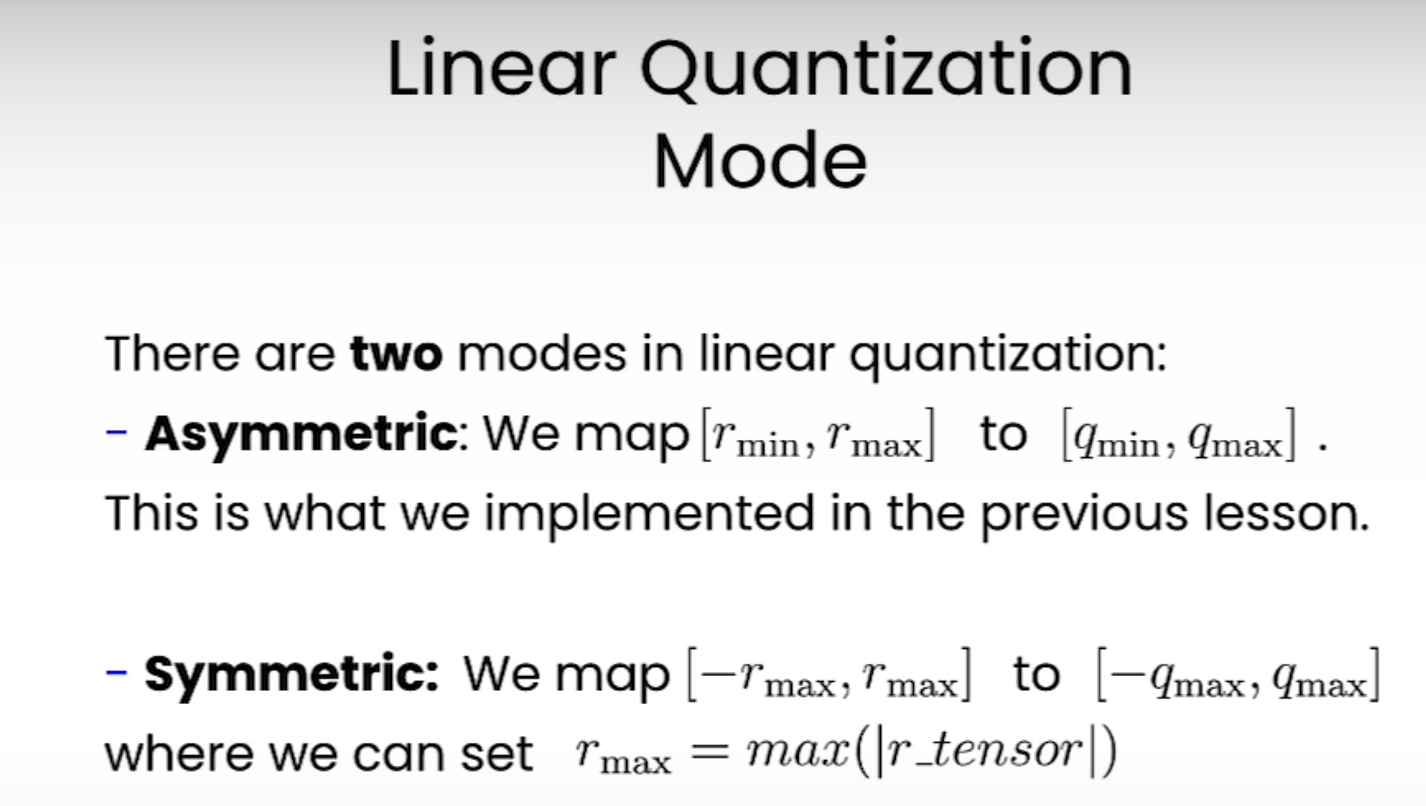

In [1]:
import torch

## Linear Quantization: Symmetric Mode

- Implement a function which returns the `scale` for Linear Quantization in Symmetric Mode.

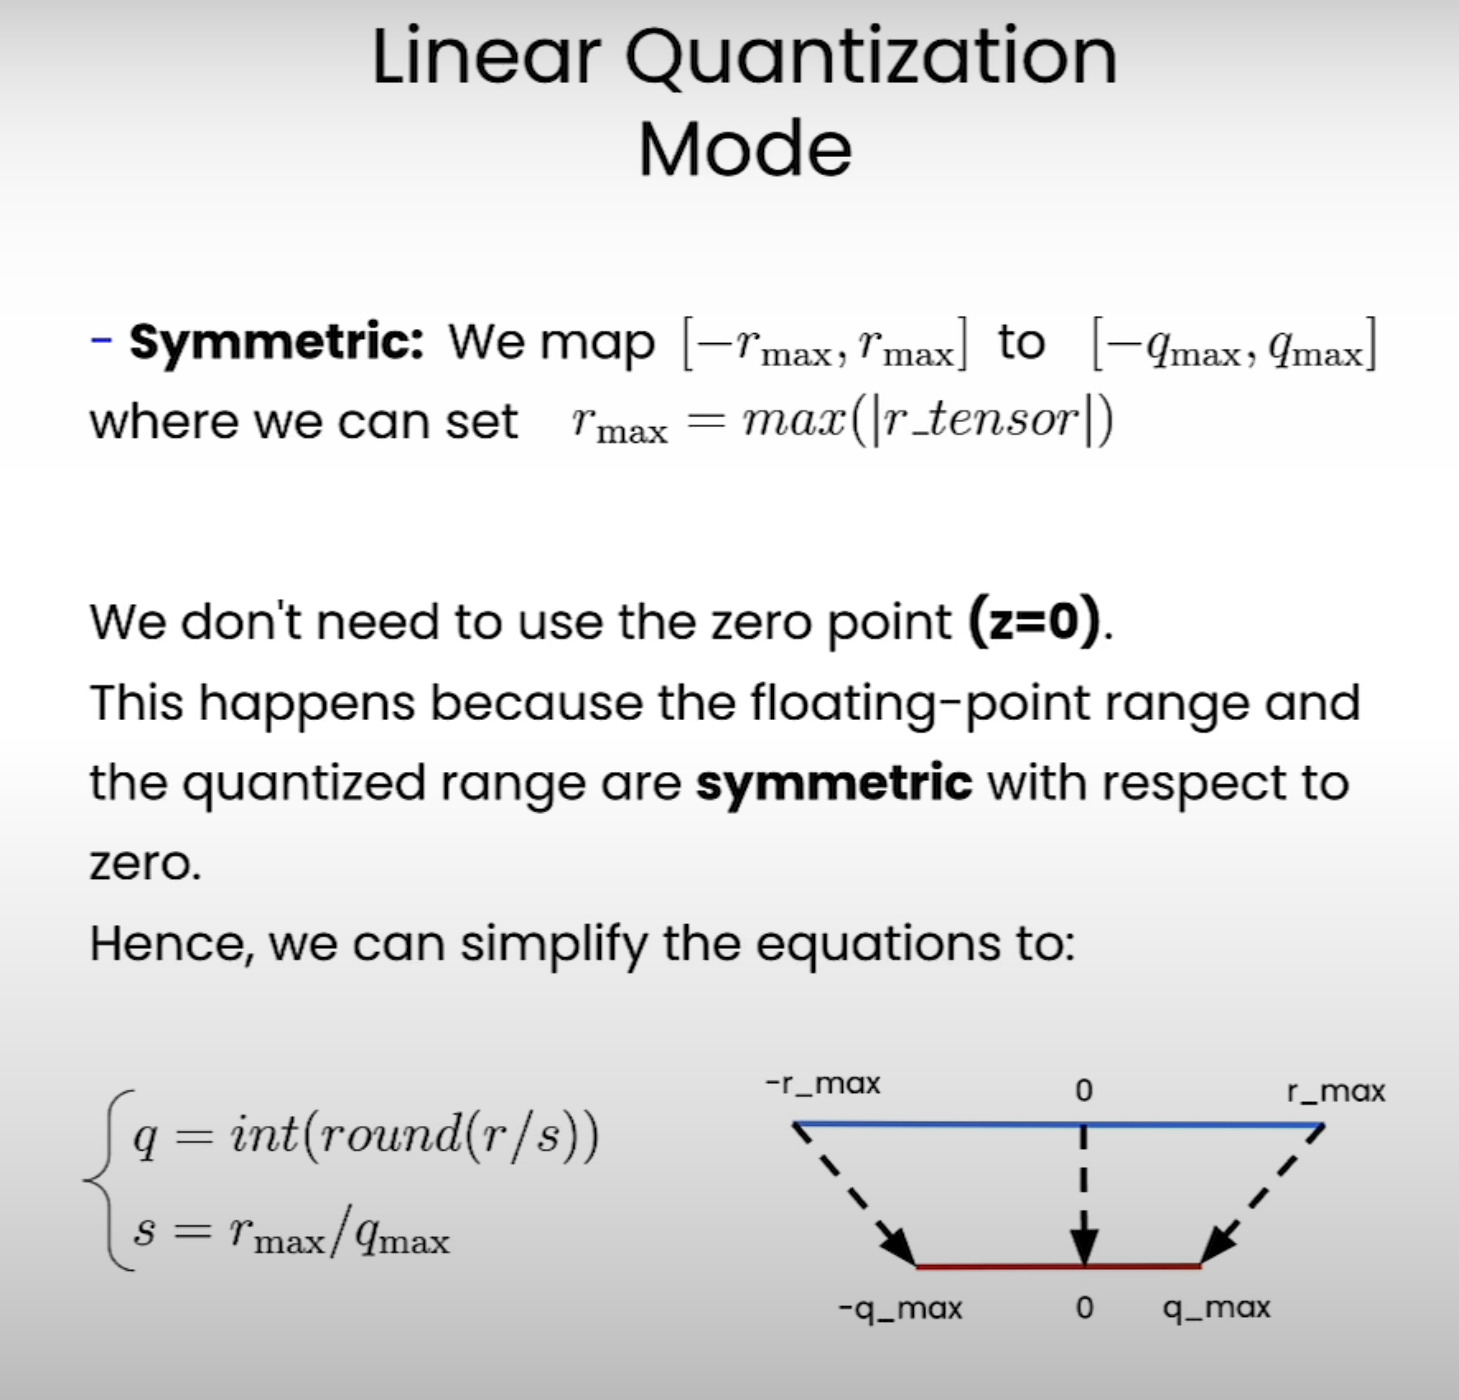

In [2]:
def get_q_scale_symmetric(tensor, dtype=torch.int8):
    r_max = tensor.abs().max().item()
    q_max = torch.iinfo(dtype).max

    # return the scale
    return r_max / q_max

In [4]:
# ## test implementation on a 4x4 matrix
test_tensor = torch.randn((4, 4))

In [5]:
test_tensor

tensor([[-0.5514,  0.1974,  2.1333, -1.3282],
        [-0.1796, -0.4405, -2.8414,  0.7115],
        [ 0.7233,  1.1414,  1.0087,  0.2169],
        [-0.6407,  0.3849, -1.5447,  0.4374]])

In [6]:
get_q_scale_symmetric(test_tensor)

0.022373265168798253

- Perform Linear Quantization in Symmetric Mode.
- `linear_q_with_scale_and_zero_point` is the same function we implemented in the previous lesson.

In [7]:
from helper1 import linear_q_with_scale_and_zero_point

In [8]:
def linear_q_symmetric(tensor, dtype=torch.int8):
    scale = get_q_scale_symmetric(tensor)

    quantized_tensor = linear_q_with_scale_and_zero_point(tensor, scale=scale, 
                                                         # in symmetric quantization zero_point is  = 0
                                                          zero_point = 0,
                                                          dtype=dtype) 
    return quantized_tensor, scale

In [9]:
quantized_tensor, scale = linear_q_symmetric(test_tensor)

### Dequantization

- Perform Dequantization
- Plot the Quantization error.
- `linear_dequantization` is the same function you implemented in the previous lesson.

In [41]:
from helper1 import linear_dequantization, plot_quantization_errors


In [42]:
def quantization_error(tensor, dequantized_tensor):
    return (dequantized_tensor - tensor).abs().square().mean()

In [43]:
dequantized_tensor = linear_dequantization(quantized_tensor,scale,0)

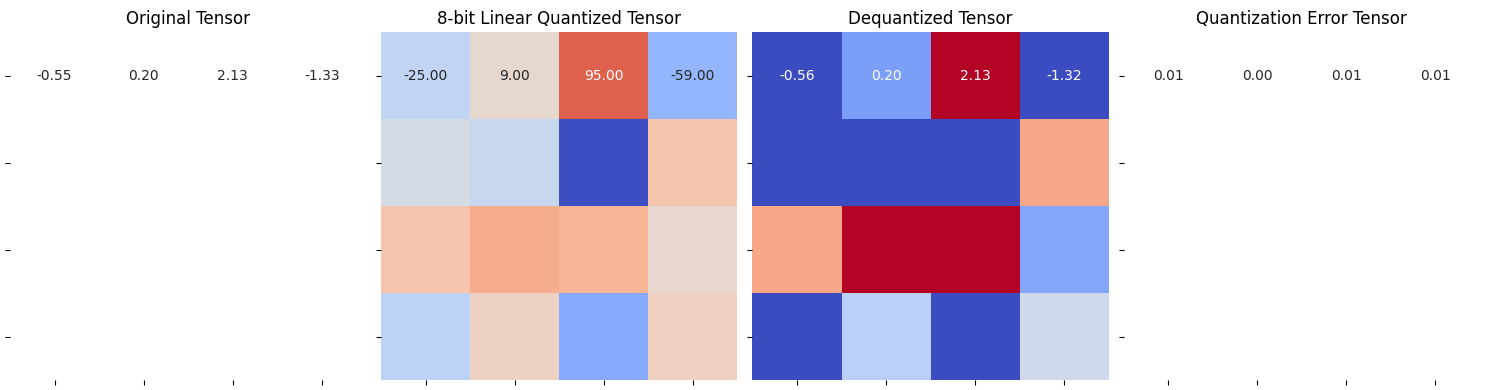

In [44]:
plot_quantization_errors(
    test_tensor, quantized_tensor, dequantized_tensor)

In [45]:
print(f"""Quantization Error : \
{quantization_error(test_tensor, dequantized_tensor)}""")

Quantization Error : 3.546970765455626e-05
